<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_Y3wMUE5_7gLdaTN.csv to test_Y3wMUE5_7gLdaTN.csv
Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i.csv


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [ ]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean())
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].mean())

In [ ]:
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean())
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean())
test_data['Credit_History'] = test_data['Credit_History'].fillna(test_data['Credit_History'].mean())

In [ ]:
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])

In [ ]:
test_data['Gender'] = test_data['Gender'].fillna(test_data['Gender'].mode()[0])
test_data['Dependents'] = test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])

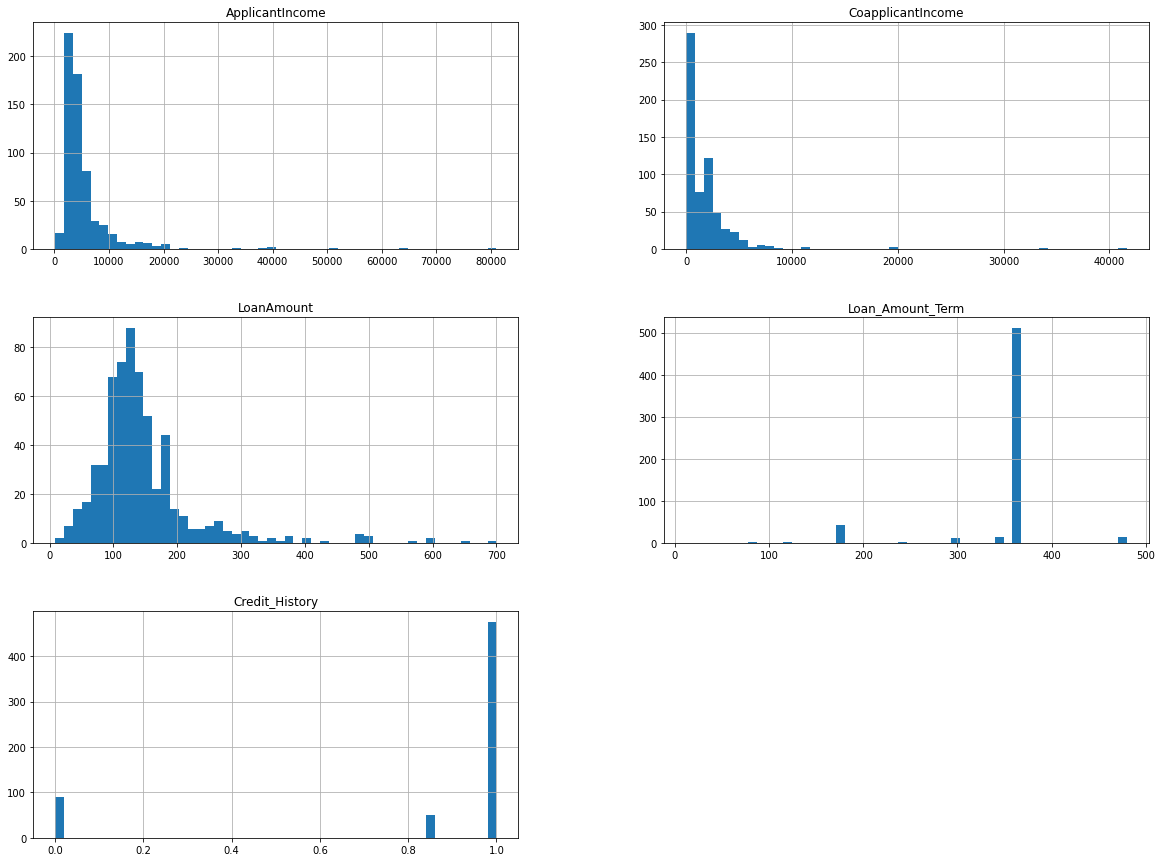

In [ ]:
train_data.hist(bins=50,figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


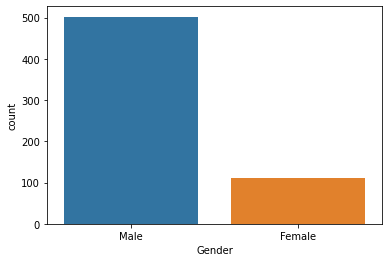

In [ ]:
sns.countplot(train_data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


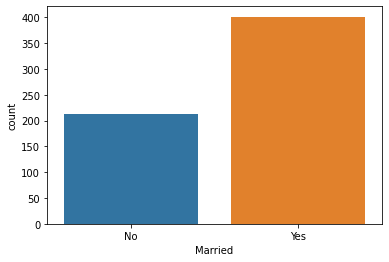

In [ ]:
sns.countplot(train_data['Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


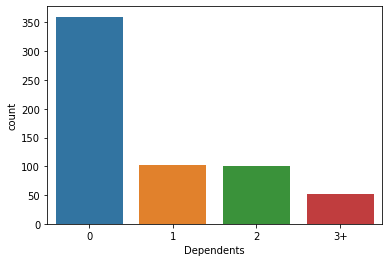

In [ ]:
sns.countplot(train_data['Dependents'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


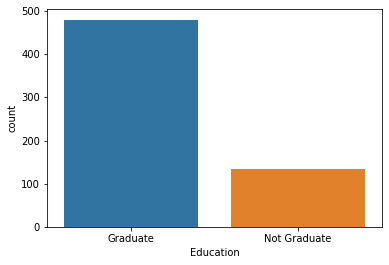

In [ ]:
sns.countplot(train_data['Education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


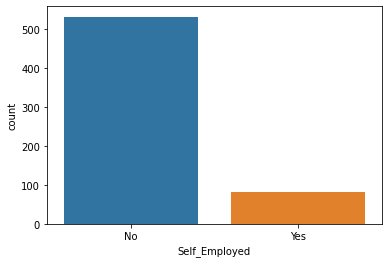

In [ ]:
sns.countplot(train_data['Self_Employed']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


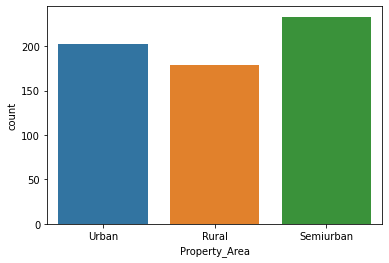

In [ ]:
sns.countplot(train_data['Property_Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


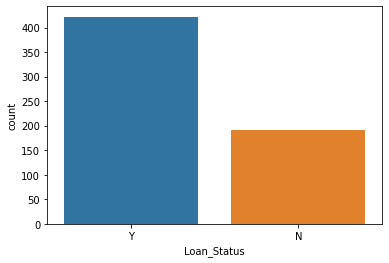

In [ ]:
sns.countplot(train_data['Loan_Status'])

In [ ]:
col = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in col:
  train_data[i] = le.fit_transform(train_data[i])

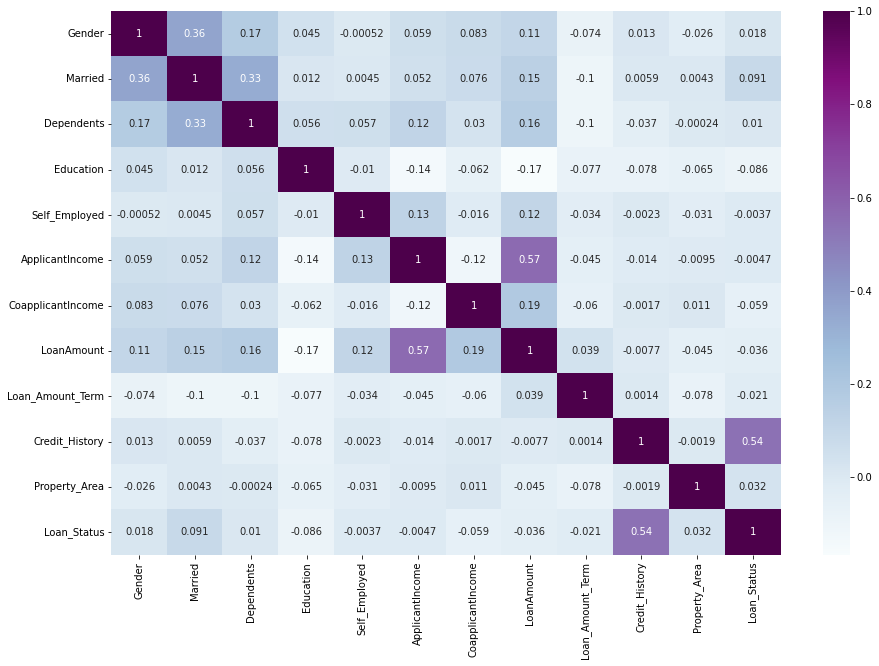

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap='BuPu')

In [ ]:
train_data.drop(['Loan_ID'],inplace=True,axis=1)
test_data.drop(['Loan_ID'],inplace=True,axis=1)

In [ ]:

train_set,test_set = train_test_split(train_data,test_size=0.2)
x_train = train_set.drop(['Loan_Status'],axis=1)
y_train = train_set['Loan_Status']
x_test = test_set.drop(['Loan_Status'],axis=1)
y_test = test_set['Loan_Status']

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
y_train

80     1
432    1
381    1
393    1
436    1
      ..
378    0
103    1
385    1
518    0
291    0
Name: Loan_Status, Length: 491, dtype: int64

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(8,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
                                 keras.layers.Dense(16,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
                                 keras.layers.Dense(32,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
                                 keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
16/16 [==============================] - 1s 14ms/step - loss: 1.0576 - accuracy: 0.6721 - val_loss: 1.0378 - val_accuracy: 0.6585
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 1.0078 - accuracy: 0.7026 - val_loss: 0.9994 - val_accuracy: 0.6504
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9662 - accuracy: 0.6986 - val_loss: 0.9635 - val_accuracy: 0.6504
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.9298 - accuracy: 0.7067 - val_loss: 0.9318 - val_accuracy: 0.6504
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8964 - accuracy: 0.7128 - val_loss: 0.9003 - val_accuracy: 0.6504
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8649 - accuracy: 0.7251 - val_loss: 0.8704 - val_accuracy: 0.6504
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.8360 - accuracy: 0.7373 - val_loss: 0.8391 - val_accuracy: 0.6992
Epoch 8/50
16/16 [=

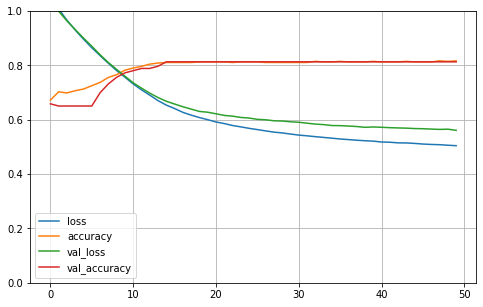

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
col = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area']
le = LabelEncoder()
for i in col:
  test_data[i] = le.fit_transform(test_data[i])

In [ ]:
test_data = scaler.fit_transform(test_data)

In [ ]:
result = model.predict(test_data)

In [ ]:
result = np.round(result)